# **Forward Propagation y Análisis de Representaciones Intermedias**

Eddson Sierra

## Ejercicio 1

Ignorando el sesgo/bias y asumiendo activación sigmoidal implementar la siguiente red neuronal en NumPy

https://gadictos.com/neural-network-pt1/
<img src="https://gadictos.com/wp-content/uploads/2019/05/bp1.png">

In [1]:
import numpy as np

In [2]:
def sigmoid(X):
  return 1/(1+np.exp(-X))

sigmoid(np.array([2,3,4]))

array([0.88079708, 0.95257413, 0.98201379])

In [3]:
Wc1 = np.array([
   [0.9,0.3,0.2],
   [0.8,0.5,0.4],
   [0.1,0.6,0.7]
])

In [4]:
Wc2 = np.array([0.3,0.5,0.9])

In [5]:
# 4 observaciones, 3 variables
X = np.array([
      [1,0,1],
      [1,2,3],
      [4,5,6],
      [6,7,8],
])

### Forward-propagation(inferencia, prediccion, o estimacion)


In [6]:
X.shape

(4, 3)

In [7]:
Wc1.shape

(3, 3)

In [8]:
H = np.matmul(X,Wc1)
H

array([[ 1. ,  0.9,  0.9],
       [ 2.8,  3.1,  3.1],
       [ 8.2,  7.3,  7. ],
       [11.8, 10.1,  9.6]])

In [9]:
H.shape

(4, 3)

In [10]:
A = sigmoid(H)
A

array([[0.73105858, 0.7109495 , 0.7109495 ],
       [0.94267582, 0.95689275, 0.95689275],
       [0.99972542, 0.99932492, 0.99908895],
       [0.9999925 , 0.99995892, 0.99993228]])

In [11]:
y_aprox = sigmoid(np.matmul(A,Wc2))
y_aprox

array([0.77112013, 0.83513309, 0.84537273, 0.8455238 ])

En unos cuantos pasos:

In [12]:
def g(X):
  return sigmoid(np.matmul(X,Wc1))

In [13]:
def f(g):
  return sigmoid(np.matmul(g,Wc2))

In [14]:
y_aprox = f(g(X))
y_aprox

array([0.77112013, 0.83513309, 0.84537273, 0.8455238 ])

### Orientado a objetos

In [15]:
class RedNeuronal:
  def __init__(self):
    self.Wc1 = np.array([
        [0.9,0.3,0.2],
        [0.8,0.5,0.4],
        [0.1,0.6,0.7]
        ])

    self. Wc2  = np.array([0.3,0.5,0.9])

  def forward_propagation(self,X):
    A = sigmoid(np.matmul(X,self.Wc1))
    y_aprox = sigmoid(np.matmul(A,self.Wc2))

    return y_aprox

In [16]:
red = RedNeuronal()
red.forward_propagation(X)

array([0.77112013, 0.83513309, 0.84537273, 0.8455238 ])

## Ejercicio 2

<img src="https://i.imgur.com/IDFRq5a.png">

[0.73105858 0.78583498 0.68997448]

In [17]:
class RedNeuronal:
  def __init__(self):
    # 1 fila por neurona , 1 columna por variable de entrada
    self.Wc1 = np.array([
        [0.8,0.4,0.3],
        [0.2,0.9,0.5]   
    ])

    # 1 elemento para cada neurona intermedia
    self. Wc2  = np.array([0.3,0.5,0.9])

  def forward_propagation(self,X):
    print("X.shape: ", X.shape)
    print("Wc1.shape: ", self.Wc1.shape)
    A = sigmoid(np.matmul(X,self.Wc1)) # 1 fila por observacion, 1 columna por representacion intermedia [4,3]
    print("salida intermedia con activación sigmoid A: \n", A)
    print("A.shape", A.shape)
    y_aprox = sigmoid(np.matmul(A,self.Wc2)) # 1 fila por observacion,  1 unica salida [4,1]
    print("y_aprox.shape: ", y_aprox.shape)
    return y_aprox

In [18]:
# 4 observaciones, 2 variables
X = np.array([
      [1,1],
      [1,2],
      [4,5],
      [6,7],
])

In [19]:
red = RedNeuronal()
y_aprox = red.forward_propagation(X)

X.shape:  (4, 2)
Wc1.shape:  (2, 3)
salida intermedia con activación sigmoid A: 
 [[0.73105858 0.78583498 0.68997448]
 [0.76852478 0.90024951 0.78583498]
 [0.98522597 0.99776215 0.97587298]
 [0.99797468 0.99983344 0.9950332 ]]
A.shape (4, 3)
y_aprox.shape:  (4,)


In [20]:
y_aprox

array([0.77438027, 0.80026216, 0.84194007, 0.84485948])

## Ejercicio 3

Instrucciones:

* Calcular para cada posible punto en el dominio de XOR la salida intermedia $ H = [h1,h2]$. 
* Mostrar la matriz resultante $H$ en el notebook. 
* Graficar cada punto de la representación intermedia (scatter), usando diferente color y/o marker según la etiqueta $Y$.
* Analizar el resultado intermedio, concluir y comentar opiniones. 

*Nota: usar solo código vectorizado*

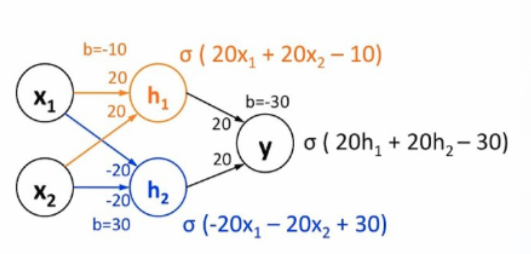

In [21]:
x = np.array([
              [0, 0],
              [0, 1],
              [1, 0],
              [0, 0]])

In [28]:
# weights and bias
w11 = np.array([[20],[20]])
w12 = np.array([[-20],[-20]])
b11 = -10
b12 = 30

w3 = np.array([[20],[20]])
b3 = -30

# hidden layer
h1 = np.dot(x,w11)+b11
h2 = np.dot(x,w12)+b12
H = sigmoid(np.hstack([h1,h2]))


# salida
y_aprox = np.around(sigmoid(np.matmul(A, w3)+b3))

Salida de la función XOR para todo su dominio:

In [29]:
y_aprox

array([[0.],
       [1.],
       [1.],
       [0.]])

### Matriz Intermedia H para todo el dominio de XOR

In [30]:
H

array([[4.53978687e-05, 1.00000000e+00],
       [9.99954602e-01, 9.99954602e-01],
       [9.99954602e-01, 9.99954602e-01],
       [4.53978687e-05, 1.00000000e+00]])

Definimos las etiquetas de XOR:

In [31]:
Y = np.array([0,1,1,0])
Y

array([0, 1, 1, 0])

Graficamos cada punto de la representación intermedia en un scatter plot con diferente color según la etiqueta:

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

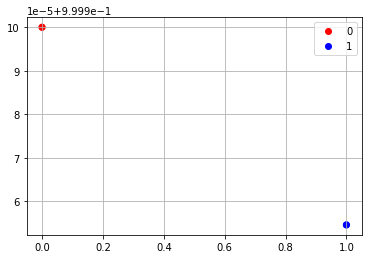

In [32]:
colours = ListedColormap(['r','b'])
classes = ["0","1"]
plot = plt.scatter(H[:,0],H[:, 1],c=list(Y),cmap=colours)

plt.legend(handles=plot.legend_elements()[0],labels=classes)
plt.grid(True)
plt.show()

Al analizar la representación intermedia H, podemos observar que H agrupa los resultados en las 2 categorías de salida posibles (0 o 1). En la representación intermedia es muy fácil ver que los datos pueden ser separados por una línea.

**Conclusiones**

* La representación intermedia en una red neuronal artificial puede ayudar a comprender el proceso por el que pasan los datos en cada capa de la red. 

* En el caso de las representaciones intermedias en una red convolucional que trabaja con imágenes, la visualización de estas representaciones permite entender las features o características principales que la red extrae en cada capa convolucional. 

* La propagación hacia adelante (forward propagation) es el proceso por el cual las entradas se propagan hacia la salida de una red neuronal artificial y se transforman a través de las multiplicaciones matriciales con los pesos de cada capa y las activaciones en las salidas correspondientes. 


**Comentarios**

Es de gran interés comprender cómo el uso de perceptrones multicapa (MLP) y funciones de activación (no lineales) permiten realizar composición de funciones a tal punto, que es posible aproximar cualquier función mediante el uso de una arquitectura y definición de parámetros apropiada. El ejemplo de función XOR es lo suficientemente ilustrativo para permitir comprender cómo una función compleja se compone de otras más simples. 


## Ejercicio 4

Determinar el numéro de parámetros entrenables (pesos) en cada uno de los siguientes modelos:

**Parámetros: 4 (asumiendo que hay sesgo)** 

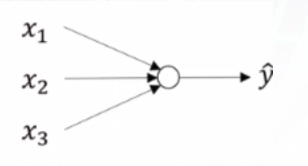


**Parámetros: 3** 

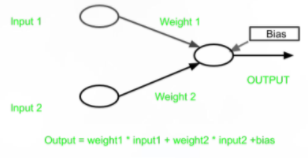

**Parámetros: 12 (asumiendo que no hay sesgo)**

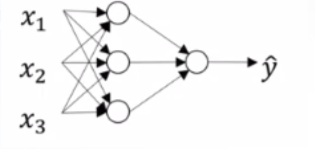

**Parámetros: 9 (asumiendo que hay sesgo)**




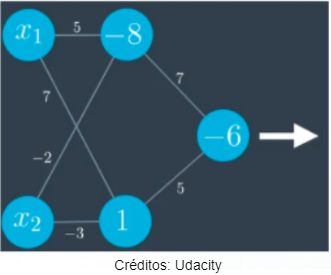

**Parámetros: 15 (asumiendo que hay sesgo)**

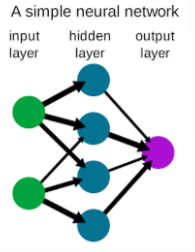

**Parámetros: 20 (asumiendo que no hay sesgo)**

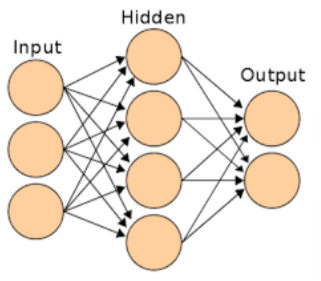